In [1]:
import numpy as np
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from urllib.request import urlretrieve
import time

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG19, VGG16
import cv2
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
from datetime import datetime
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten    
from tensorflow.keras.layers import BatchNormalization, Dropout

# 웹크롤링

In [8]:
driver = webdriver.Chrome('chromedriver.exe')
url = 'https://www.google.com/imghp?h1=ko&ogbl'
driver.get(url)
elem = driver.find_element(By.NAME,'q')
search_img = 'guinea pig'
elem.send_keys(search_img)
elem.send_keys(Keys.RETURN)
last_height = driver.execute_script("return document.body.scrollHeight;")
last_height = driver.execute_script("return document.body.scrollHeight;")
while True:
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    # driver.implicitly_wait(3)
    time.sleep(2)
    new_height = driver.execute_script("return document.body.scrollHeight;")
    if new_height == last_height:
        try:
            driver.find_element(By.CSS_SELECTOR,'.mye4qd').click()
        except:
            break
    last_height = new_height
    
driver.implicitly_wait(1)
images = driver.find_elements(By.CSS_SELECTOR,".rg_i.Q4LuWd")
cnt =1
for image in images:
    try:
        image.click()
        driver.implicitly_wait(1)
        img_url = driver.find_element(By.CSS_SELECTOR, '.r48jcc').get_attribute('src')
        urlretrieve(img_url,"C:\\work\\gmmodel\\"+'gui'+str(cnt)+'.jpg')
        cnt +=1
    except:
        pass
driver.close()

C:\Users\juhae\AppData\Local\Temp\ipykernel_3696\3340001446.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [14]:
driver = webdriver.Chrome('chromedriver.exe')
url = 'https://www.google.com/imghp?h1=ko&ogbl'
driver.get(url)
elem = driver.find_element(By.NAME,'q')
search_img = 'rat'
elem.send_keys(search_img)
elem.send_keys(Keys.RETURN)
last_height = driver.execute_script("return document.body.scrollHeight;")
last_height = driver.execute_script("return document.body.scrollHeight;")
while True:
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    # driver.implicitly_wait(3)
    time.sleep(2)
    new_height = driver.execute_script("return document.body.scrollHeight;")
    if new_height == last_height:
        try:
            driver.find_element(By.CSS_SELECTOR,'.mye4qd').click()
        except:
            break
    last_height = new_height
    
driver.implicitly_wait(1)
images = driver.find_elements(By.CSS_SELECTOR,".rg_i.Q4LuWd")
cnt =1
for image in images:
    try:
        image.click()
        driver.implicitly_wait(1)
        img_url = driver.find_element(By.CSS_SELECTOR, '.r48jcc').get_attribute('src')
        urlretrieve(img_url,"C:\\work\\gmmodel\\"+'mouse'+str(cnt)+'.jpg')
        cnt +=1
    except:
        pass
driver.close()

C:\Users\juhae\AppData\Local\Temp\ipykernel_3696\1741709427.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


# 샘플 데이터 이미지 시각화

In [21]:
glob('C:\\work\\gmmodel\\*.jpg')

['C:\\work\\gmmodel\\gui1.jpg',
 'C:\\work\\gmmodel\\gui10.jpg',
 'C:\\work\\gmmodel\\gui100.jpg',
 'C:\\work\\gmmodel\\gui101.jpg',
 'C:\\work\\gmmodel\\gui102.jpg',
 'C:\\work\\gmmodel\\gui103.jpg',
 'C:\\work\\gmmodel\\gui104.jpg',
 'C:\\work\\gmmodel\\gui105.jpg',
 'C:\\work\\gmmodel\\gui106.jpg',
 'C:\\work\\gmmodel\\gui107.jpg',
 'C:\\work\\gmmodel\\gui108.jpg',
 'C:\\work\\gmmodel\\gui109.jpg',
 'C:\\work\\gmmodel\\gui11.jpg',
 'C:\\work\\gmmodel\\gui110.jpg',
 'C:\\work\\gmmodel\\gui111.jpg',
 'C:\\work\\gmmodel\\gui112.jpg',
 'C:\\work\\gmmodel\\gui113.jpg',
 'C:\\work\\gmmodel\\gui114.jpg',
 'C:\\work\\gmmodel\\gui115.jpg',
 'C:\\work\\gmmodel\\gui116.jpg',
 'C:\\work\\gmmodel\\gui117.jpg',
 'C:\\work\\gmmodel\\gui118.jpg',
 'C:\\work\\gmmodel\\gui119.jpg',
 'C:\\work\\gmmodel\\gui12.jpg',
 'C:\\work\\gmmodel\\gui120.jpg',
 'C:\\work\\gmmodel\\gui121.jpg',
 'C:\\work\\gmmodel\\gui122.jpg',
 'C:\\work\\gmmodel\\gui123.jpg',
 'C:\\work\\gmmodel\\gui124.jpg',
 'C:\\work\\gmmodel

In [22]:
len(glob('C:\\work\\gmmodel\\*.jpg')) 

909

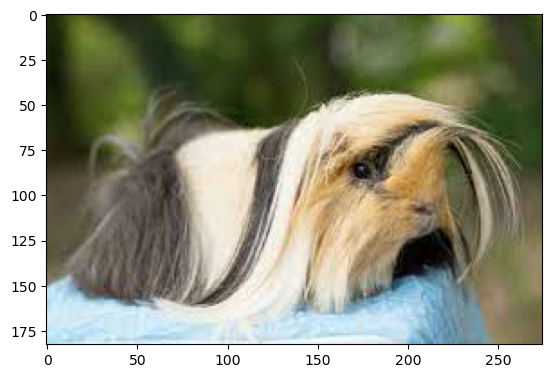

In [23]:
dt = plt.imread(glob('C:\\work\\gmmodel\\*.jpg')[1])
plt.imshow(dt)

In [24]:
dt.shape

(183, 275, 3)

# 모델 구축하기

In [25]:
# (909 ,300, 400, 3)  ---- (1, 300,300, 3)
file_list = glob('C:\\work\\gmmodel\\*.jpg')

In [26]:
x1 = np.random.randn(300, 300, 3)
x2 = np.random.randn(300,300, 3)
x= np.r_[[x1], [x2]]
x.shape

(2, 300, 300, 3)

In [27]:
dt = cv2.resize(dt,(300,300))

In [28]:
dt = dt[:,:,:3]
# 그냥 3까지 떼 버리기

In [29]:
## 데이터 분석
# x data = gui_rat
st = datetime.now()
gui_rat = np.zeros((len(file_list),300,300,3))
gui_rat_type = []
for i,file in enumerate(file_list):
    dt = plt.imread(file)
    dt = cv2.resize(dt,(300,300))
    dt = dt[:,:,:3]   # resize하기 - 그냥 3까지 떼 버리기.
    gui_rat[i] = dt
    if 'gui' in file:
        gui_rat_type.append(0)
    else:
        gui_rat_type.append(1)

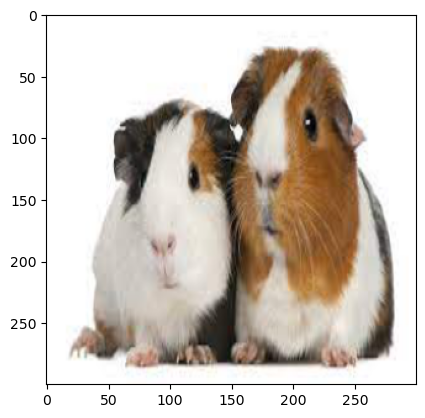

In [30]:
# dog_cat[2].dtype float형이라 int로 줘야 보임
plt.imshow(gui_rat[2].astype('int'))

In [31]:
#train, test 6:4로 나누기
X_train, X_test, y_train, y_test = train_test_split(gui_rat, gui_rat_type, test_size = 0.4, 
                                                    random_state = 42)

In [32]:
#test set을 5:5로 test, val 나누기 // 총 6:2:2
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                 test_size=0.5,
                                                 random_state = 42)

In [33]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
y_val  = np.array(y_val).reshape(-1, 1)
X_train.shape , y_train.shape , X_val.shape, y_val.shape

((545, 300, 300, 3), (545, 1), (182, 300, 300, 3), (182, 1))

In [34]:
X_train.shape

(545, 300, 300, 3)

In [35]:
type(X_train), type(y_train), type(y_test), type(X_val), type(y_val)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [36]:
gui_rat_type

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [37]:
y_train, y_val

(array([[1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],

In [38]:
model = Sequential(
    [
        Conv2D(16, (5, 5), activation='relu', input_shape=(300,300,3)),
        BatchNormalization(),
        MaxPooling2D((5,5)),
        Conv2D(64, (5, 5), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((5,5)),
        Conv2D(128, (5, 5), activation='relu'),
        MaxPooling2D((5,5)),
        Flatten(),
        Dense(2048, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 296, 296, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 64)        25664     
                                                                 
 batch_normalization_1 (Batc  (None, 55, 55, 64)       256       
 hNormalization)                                                 
                                                        

In [39]:
y_train.shape

(545, 1)

In [40]:
opt = 'adam'
loss = 'binary_crossentropy'
metrics = ['accuracy']

model.compile(optimizer = opt,
             loss = loss, 
             metrics = metrics)

In [41]:
hist = model.fit(X_train, y_train, 
         epochs= 10,
         batch_size = 90,
         validation_data=(X_val, y_val),
         verbose=2, shuffle=True)

# # history = model.fit(x_train,y_train,
#         batch_size = 32,
#         epochs=30,
#         validation_data=(x_valid, y_vaild),
#         verbose=2, 
#         shuffle=True)

Epoch 1/10
7/7 - 64s - loss: 1.4293 - accuracy: 0.5394 - val_loss: 1.1931 - val_accuracy: 0.3791 - 64s/epoch - 9s/step
Epoch 2/10
7/7 - 49s - loss: 0.8592 - accuracy: 0.5193 - val_loss: 1.1848 - val_accuracy: 0.6209 - 49s/epoch - 7s/step
Epoch 3/10
7/7 - 53s - loss: 0.6980 - accuracy: 0.6532 - val_loss: 0.6684 - val_accuracy: 0.5989 - 53s/epoch - 8s/step
Epoch 4/10
7/7 - 45s - loss: 0.6033 - accuracy: 0.7046 - val_loss: 0.7066 - val_accuracy: 0.6209 - 45s/epoch - 6s/step
Epoch 5/10
7/7 - 47s - loss: 0.5528 - accuracy: 0.7303 - val_loss: 0.6222 - val_accuracy: 0.6264 - 47s/epoch - 7s/step
Epoch 6/10
7/7 - 48s - loss: 0.4845 - accuracy: 0.7817 - val_loss: 1.3025 - val_accuracy: 0.6209 - 48s/epoch - 7s/step
Epoch 7/10
7/7 - 44s - loss: 0.4632 - accuracy: 0.7835 - val_loss: 0.7879 - val_accuracy: 0.6319 - 44s/epoch - 6s/step
Epoch 8/10
7/7 - 46s - loss: 0.4339 - accuracy: 0.7927 - val_loss: 0.7169 - val_accuracy: 0.6429 - 46s/epoch - 7s/step
Epoch 9/10
7/7 - 55s - loss: 0.4271 - accuracy: 

In [42]:
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률 = ', score[1],'loss=', score[0])

6/6 [==============================] - 4s 632ms/step - loss: 0.7500 - accuracy: 0.6813
정답률 =  0.6813187003135681 loss= 0.7499635219573975


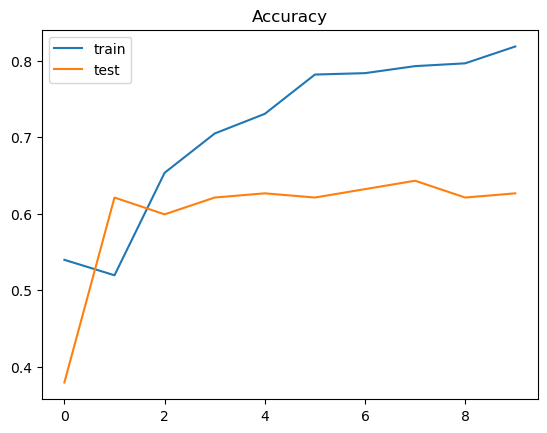

In [45]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

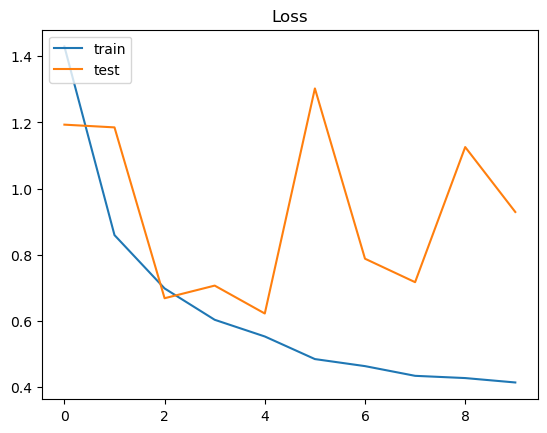

In [46]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

# 전이학습 모델

In [47]:
## 필요모듈 
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.applications import VGG16

In [48]:
# (909 ,300, 400, 3)  ---- (1, 300,300, 3)
file_list = glob('C:\\work\\gmmodel\\*.jpg')

In [49]:
## 파일 만들기
X = np.zeros((len(file_list),150,150,3))
y = []
for idx, file in enumerate(file_list):
    tmp = cv2.imread(file)
    tmp = cv2.resize(tmp,(150,150))
    X[idx] = tmp
    if 'gui' in file:
        y.append(0)
    else:
        y.append(1)
y = np.array(y).reshape(-1,1)

In [55]:
len(file_list)

909

In [56]:
idx = np.random.choice(np.arange(909),909,replace=False)

In [57]:
X.size, y.size

(61357500, 909)

In [59]:
int(909*0.8)

727

In [60]:
X = X[idx]
y = y[idx]
X_train = X[:727]
y_train = y[:727]
X_test = X[727:]
y_test = y[727:]

In [61]:
pre_conv = VGG16(include_top=False,
                 input_shape=(150,150,3))
pre_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [62]:
model = Sequential(
    [
        Flatten(),
        Dense(256,activation='relu'),
        Dense(1,activation='sigmoid')
    ]
)

In [63]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [64]:
X_train = pre_conv.predict(X_train)
model.fit(
    X_train,
    y_train,
    epochs=8
)

23/23 [==============================] - 167s 7s/step
Epoch 1/8
23/23 [==============================] - 2s 39ms/step - loss: 9.6527 - accuracy: 0.8019
Epoch 2/8
23/23 [==============================] - 1s 46ms/step - loss: 0.1166 - accuracy: 0.9780
Epoch 3/8
23/23 [==============================] - 1s 39ms/step - loss: 0.0023 - accuracy: 0.9986
Epoch 4/8
23/23 [==============================] - 1s 42ms/step - loss: 0.0032 - accuracy: 0.9986
Epoch 5/8
23/23 [==============================] - 1s 37ms/step - loss: 1.0279e-04 - accuracy: 1.0000
Epoch 6/8
23/23 [==============================] - 1s 41ms/step - loss: 5.7335e-05 - accuracy: 1.0000
Epoch 7/8
23/23 [==============================] - 1s 40ms/step - loss: 3.9626e-05 - accuracy: 1.0000
Epoch 8/8
23/23 [==============================] - 1s 38ms/step - loss: 3.3066e-05 - accuracy: 1.0000


In [67]:
def image_predict(x):
    dt = cv2.imread(x)
    plt.imshow(dt)
    plt.show()
    dt = cv2.resize(dt,(150,150))
    dt = dt.reshape(1,150,150,3)
    dt = pre_conv.predict(dt)
    return np.where(model.predict(dt) >0.5,'쥐','기니피그')[0]

In [68]:
x = plt.imread('11.jpg')

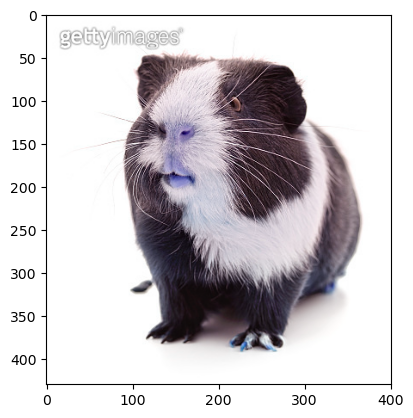

1/1 [==============================] - 0s 80ms/step


array(['기니피그'], dtype='<U4')

In [69]:
image_predict('11.jpg')

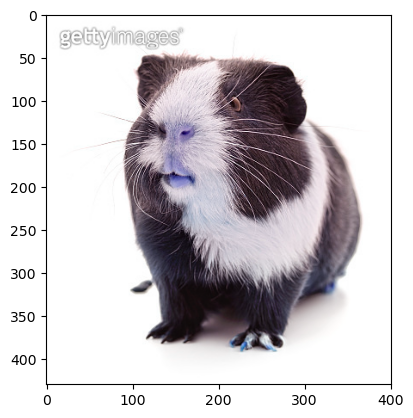

1/1 [==============================] - 0s 80ms/step


array(['기니피그'], dtype='<U4')

In [69]:
image_predict('11.jpg')

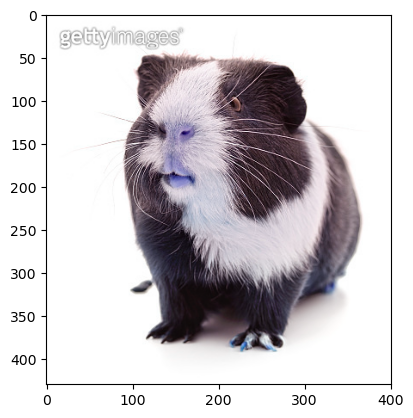

1/1 [==============================] - 0s 80ms/step


array(['기니피그'], dtype='<U4')

In [69]:
image_predict('11.jpg')

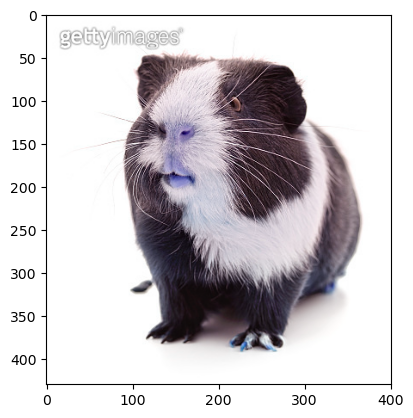

1/1 [==============================] - 0s 80ms/step


array(['기니피그'], dtype='<U4')

In [69]:
image_predict('11.jpg')

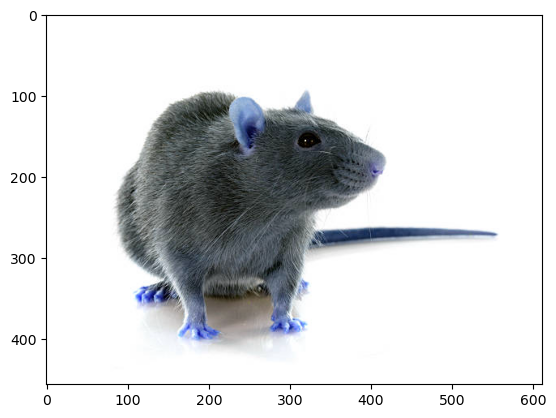

1/1 [==============================] - 0s 37ms/step


array(['쥐'], dtype='<U4')

In [70]:
image_predict('12.jpg')